<a href="https://colab.research.google.com/github/RafaGusmao/Data-Science-Fetal-Health-Classification-with-PyCaret/blob/main/Fetal_Health_Classification_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fetal Health Classification with PyCaret

**Context**

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

**Data**

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:


*   Normal
*   Suspect
*   Pathological




In [32]:
#install pycaret
!pip install pycaret -q

In [33]:
#import docs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
data = pd.read_csv('/content/fetal_health.csv')
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# Exploratory data analysis

Here we will check the main information about the dataset and verify some important data for the correct progress of our machine learning model with pycart.

In [35]:
#checking dataset size:
data.shape

(2126, 22)

In [36]:
#info of dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [37]:
#checking for null values
data.isnull().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


<Axes: xlabel='fetal_health', ylabel='count'>

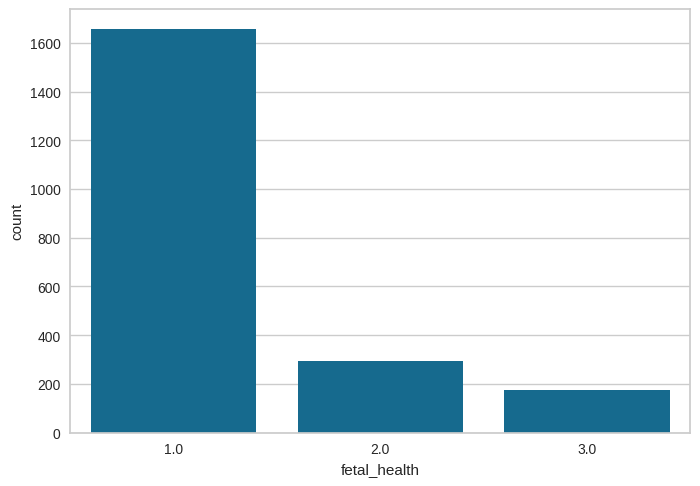

In [38]:
#bar graph plot:
sns.countplot(x = data['fetal_health'])

From the brief analyses, we observed that this dataset is easy to analyze, there are no null values ​​and the types of variables are correctly classified.

Furthermore, we also observed that the "normal" values ​​in the fetal_health column are mostly greater than the "suspect" and
"pathological". Data standardization and leveling are necessary.

# Machine Learning with Pycaret

In this project, we will use pycaret to make predictions about our data using the fetal_health column as a target, which presents up to 3 types of 'classes':

1.0 = Normal

2.0 = Suspect

3.0 = Pathological

In [39]:
# separating data into test and training
test = data.sample(frac=0.10)
train = data.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [40]:
from pycaret.classification import *
# creating the PyCaret setup
clf = setup(data = train, target = 'fetal_health')

,Description,Value
0,Session id,3084
1,Target,fetal_health
2,Target type,Multiclass
3,Target mapping,"1.0: 0, 2.0: 1, 3.0: 2"
4,Original data shape,"(1913, 22)"
5,Transformed data shape,"(1913, 22)"
6,Transformed train set shape,"(1339, 22)"
7,Transformed test set shape,"(574, 22)"
8,Numeric features,21
9,Preprocess,True


In [41]:
!pip install mlflow -q

In [42]:
# creating the pipeline
clf = setup(data = data,
            target = 'fetal_health',
            normalize = True,
            transformation = True,
            )

,Description,Value
0,Session id,7238
1,Target,fetal_health
2,Target type,Multiclass
3,Target mapping,"1.0: 0, 2.0: 1, 3.0: 2"
4,Original data shape,"(2126, 22)"
5,Transformed data shape,"(2126, 22)"
6,Transformed train set shape,"(1488, 22)"
7,Transformed test set shape,"(638, 22)"
8,Numeric features,21
9,Preprocess,True


In [43]:
# best = compare_models()
best = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9496,0.9875,0.9496,0.9494,0.9476,0.8569,0.8601,1.6020
xgboost,Extreme Gradient Boosting,0.9462,0.9870,0.9462,0.9460,0.9452,0.8501,0.8516,0.3880
gbc,Gradient Boosting Classifier,0.9456,0.0000,0.9456,0.9456,0.9443,0.8469,0.8495,0.9470
rf,Random Forest Classifier,0.9308,0.9853,0.9308,0.9295,0.9281,0.8029,0.8068,0.3140
et,Extra Trees Classifier,0.9187,0.9764,0.9187,0.9162,0.9148,0.7634,0.7678,0.2440
dt,Decision Tree Classifier,0.9160,0.8911,0.9160,0.9189,0.9163,0.7739,0.7762,0.2450
knn,K Neighbors Classifier,0.8925,0.9468,0.8925,0.8897,0.8876,0.6857,0.6917,0.2280
ada,Ada Boost Classifier,0.8885,0.0000,0.8885,0.8932,0.8881,0.6904,0.6950,0.1980
lr,Logistic Regression,0.8858,0.0000,0.8858,0.8868,0.8847,0.6860,0.6879,0.8910
svm,SVM - Linear Kernel,0.8804,0.0000,0.8804,0.8840,0.8793,0.6707,0.6736,0.2540


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [44]:
#best model:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7238, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [45]:
#instantiating model:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9530,0.9928,0.9530,0.9530,0.9514,0.8679,0.8699
1,0.9463,0.9803,0.9463,0.9462,0.9451,0.8525,0.8533
2,0.9799,0.9963,0.9799,0.9804,0.9792,0.9432,0.9450
3,0.9799,0.9995,0.9799,0.9796,0.9797,0.9446,0.9448
4,0.9799,1.0000,0.9799,0.9804,0.9795,0.9432,0.9447
5,0.9060,0.9580,0.9060,0.9013,0.8958,0.7144,0.7286
6,0.9195,0.9845,0.9195,0.9175,0.9162,0.7673,0.7715
7,0.9463,0.9895,0.9463,0.9478,0.9463,0.8519,0.8523
8,0.9527,0.9888,0.9527,0.9525,0.9497,0.8625,0.8689


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [46]:
#parameter tuning:
tuned_lgbm = tune_model(lgbm, optimize = 'Accuracy')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:11:29
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9597,0.9895,0.9597,0.9611,0.9577,0.8838,0.8886
1,0.9396,0.9804,0.9396,0.9373,0.9376,0.8319,0.8329
2,0.9530,0.9815,0.9530,0.9519,0.9514,0.8658,0.8684
3,0.9732,0.9985,0.9732,0.9732,0.9732,0.9270,0.9270
4,0.9799,0.9955,0.9799,0.9800,0.9798,0.9445,0.9447
5,0.9060,0.9500,0.9060,0.9036,0.9038,0.7313,0.7334
6,0.9128,0.9795,0.9128,0.9098,0.9099,0.7510,0.7536
7,0.9396,0.9769,0.9396,0.9427,0.9395,0.8332,0.8340
8,0.9527,0.9821,0.9527,0.9517,0.9518,0.8692,0.8699


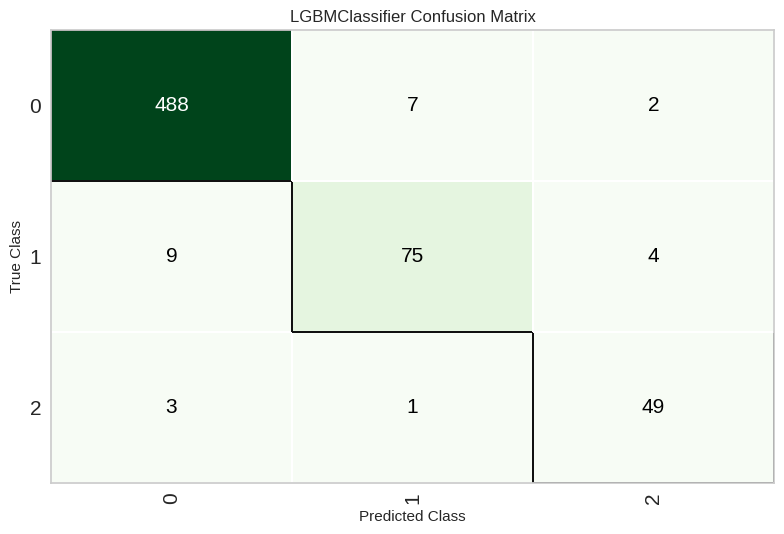

In [54]:
#confusion matrix
plot_model(tuned_lgbm, plot='confusion_matrix')

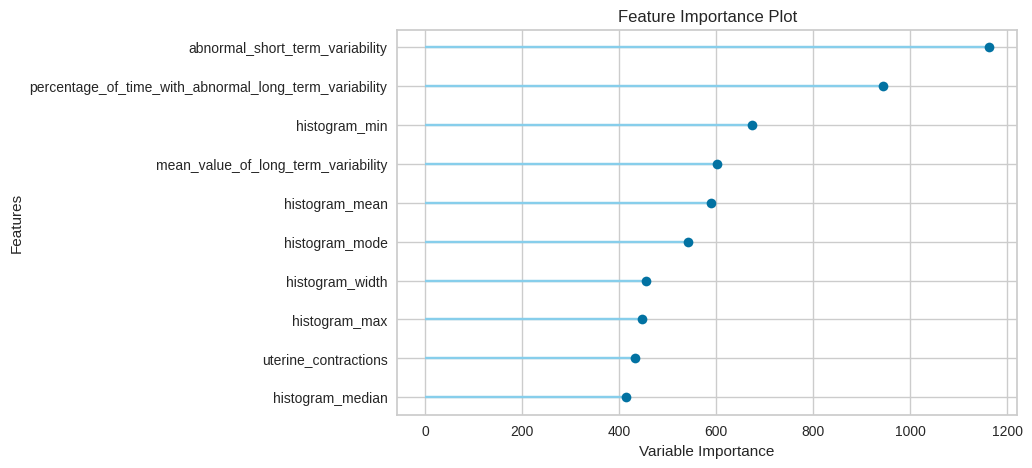

In [55]:
#plot
plot_model(tuned_lgbm, plot='feature')

In [56]:
# evaluating the model
evaluate_model(tuned_lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [57]:
# finishing the model
final_lgbm = finalize_model(tuned_lgbm)

In [58]:
#predicting by model
predict_model(final_lgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9969,0.9997,0.9969,0.9969,0.9969,0.9914,0.9914


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,prediction_label,prediction_score
1441,146.0,0.010,0.000,0.004,0.000,0.0,0.000,35.0,1.0,0.0,...,2.0,0.0,155.0,154.0,155.0,4.0,0.0,1.0,1,1.0000
624,130.0,0.007,0.021,0.003,0.000,0.0,0.000,45.0,2.8,0.0,...,2.0,0.0,134.0,135.0,137.0,24.0,1.0,1.0,1,1.0000
1328,128.0,0.006,0.006,0.005,0.004,0.0,0.000,32.0,1.5,0.0,...,6.0,0.0,133.0,133.0,135.0,16.0,1.0,1.0,1,1.0000
552,136.0,0.016,0.000,0.004,0.000,0.0,0.000,35.0,4.9,0.0,...,11.0,2.0,146.0,159.0,162.0,74.0,1.0,1.0,1,1.0000
617,142.0,0.000,0.001,0.002,0.000,0.0,0.000,30.0,2.9,5.0,...,1.0,0.0,141.0,140.0,144.0,9.0,1.0,1.0,1,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,133.0,0.000,0.000,0.006,0.009,0.0,0.000,20.0,2.7,0.0,...,7.0,0.0,136.0,124.0,134.0,61.0,1.0,1.0,1,1.0000
613,146.0,0.009,0.003,0.001,0.000,0.0,0.000,41.0,1.9,0.0,...,7.0,0.0,154.0,152.0,155.0,18.0,1.0,1.0,1,1.0000
1717,131.0,0.010,0.000,0.003,0.001,0.0,0.000,54.0,1.4,0.0,...,7.0,0.0,151.0,143.0,147.0,20.0,1.0,1.0,1,1.0000
1772,120.0,0.000,0.000,0.002,0.008,0.0,0.002,64.0,1.3,0.0,...,8.0,0.0,86.0,98.0,100.0,38.0,0.0,3.0,3,0.9999


In [59]:
# making predictions with test set
test_preds = predict_model(final_lgbm, data=test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [60]:
test_preds.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,prediction_label,prediction_score
0,125.0,0.005,0.015,0.007,0.000,0.0,0.0,66.0,4.1,5.0,...,0.0,0.0,133.0,126.0,134.0,1.0,0.0,1.0,1,0.9999
1,130.0,0.000,0.009,0.006,0.000,0.0,0.0,72.0,2.6,5.0,...,1.0,0.0,130.0,127.0,131.0,1.0,-1.0,1.0,1,0.9999
2,142.0,0.008,0.009,0.003,0.000,0.0,0.0,45.0,1.1,2.0,...,5.0,0.0,146.0,153.0,152.0,19.0,1.0,1.0,1,1.0000
3,128.0,0.000,0.007,0.007,0.007,0.0,0.0,65.0,2.0,0.0,...,3.0,1.0,129.0,119.0,127.0,13.0,0.0,1.0,1,1.0000
4,122.0,0.006,0.000,0.004,0.001,0.0,0.0,22.0,1.8,0.0,...,1.0,0.0,131.0,128.0,130.0,7.0,0.0,1.0,1,1.0000


# Conclusion

In this project, it can be concluded that pycaret was extremely important in achieving almost "perfect" accuracy in our model. predictions are being made correctly, both in training and testing. Therefore, the model is fully prepared to receive new data and make new predictions. We use the Light Gradient Boosting Machine, as it presents the best metrics, according to pycaret.